In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
import joblib
%matplotlib inline

In [104]:
import warnings

warnings.filterwarnings('ignore')

# Data Collection

In [105]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('oil_test_final.csv')

# Exploratory Data Analysis

In [106]:
# view dimensions of dataset
df.shape

(133, 10)

In [107]:
# preview the dataset
df.head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,EXTENSION,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,SANDSTONE,745.0,144.0,10.0,8.0
1,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,SANDSTONE,509.0,410.0,20.0,300.0
2,COMPRESSION/EVAPORITE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,LIMESTONE,300.0,105.0,10.0,20.0
3,INVERSION/COMPRESSION/EXTENSION,OIL,NEARLY DEPLETED,RIFT,9790,SANDSTONE,886.0,344.0,17.0,500.0
4,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,SANDSTONE,670.0,0.0,21.0,250.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tectonic regime                 133 non-null    object 
 1   Hydrocarbon type                133 non-null    object 
 2   Reservoir status                133 non-null    object 
 3   Structural setting              133 non-null    object 
 4   Depth                           133 non-null    int64  
 5   Lithology                       133 non-null    object 
 6   Thickness (gross average ft)    133 non-null    float64
 7   Thickness (net pay average ft)  133 non-null    float64
 8   Porosity                        133 non-null    float64
 9   Permeability                    133 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 10.5+ KB


In [109]:
col_names = ['Tectonic regime', 'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Lithology']


for col in col_names:
    
    print(df[col].value_counts()) 

COMPRESSION                                                                     24
EXTENSION                                                                       16
COMPRESSION/EVAPORITE                                                           13
INVERSION/COMPRESSION/EXTENSION                                                 12
COMPRESSION/EROSION                                                             11
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                                     6
STRIKE-SLIP/TRANSPRESSION/BASEMENT-I                                             5
EXTENSION/EROSION                                                                4
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                                        4
GRAVITY/EVAPORITE/COMPRESSION                                                    3
COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I                                 3
INVERSION/COMPRESSION/EXTENSION/EROSION                                          3
COMP

In [110]:
df['Hydrocarbon type'].value_counts()

OIL                101
GAS                 22
GAS-CONDENSATE       8
METHANE HYDRATE      1
BITUMEN              1
Name: Hydrocarbon type, dtype: int64

In [111]:
# check missing values in variables
df.isnull().sum()

Tectonic regime                   0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

# Data Split between Target Variable and Feature Vector

In [112]:
X = df.drop(['Hydrocarbon type'], axis=1)

y = df['Hydrocarbon type']

# Label Encoding

In [113]:
# specify the columns to be encoded
columns_to_encode = ['Tectonic regime', 'Reservoir status', 'Structural setting', 'Lithology']  

# encode the specified columns
X[columns_to_encode] = X[columns_to_encode].apply(LabelEncoder().fit_transform)

# (contd. Exploratory Data Analysis)

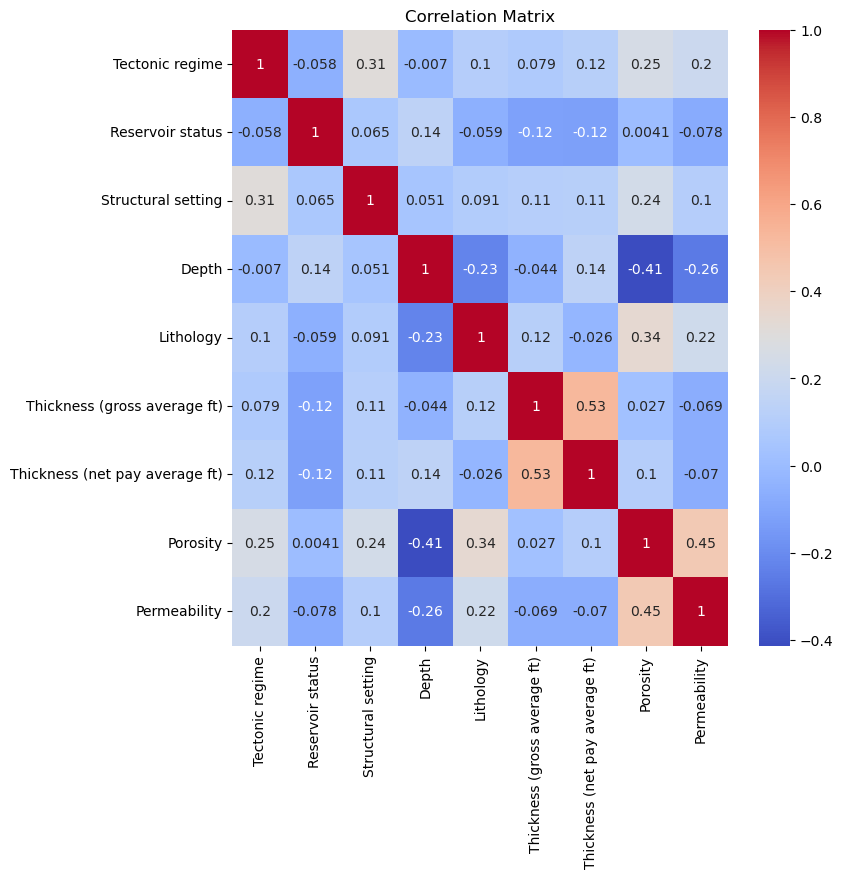

In [114]:
# Compute correlation matrix
corr = X.corr()

# Generate heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

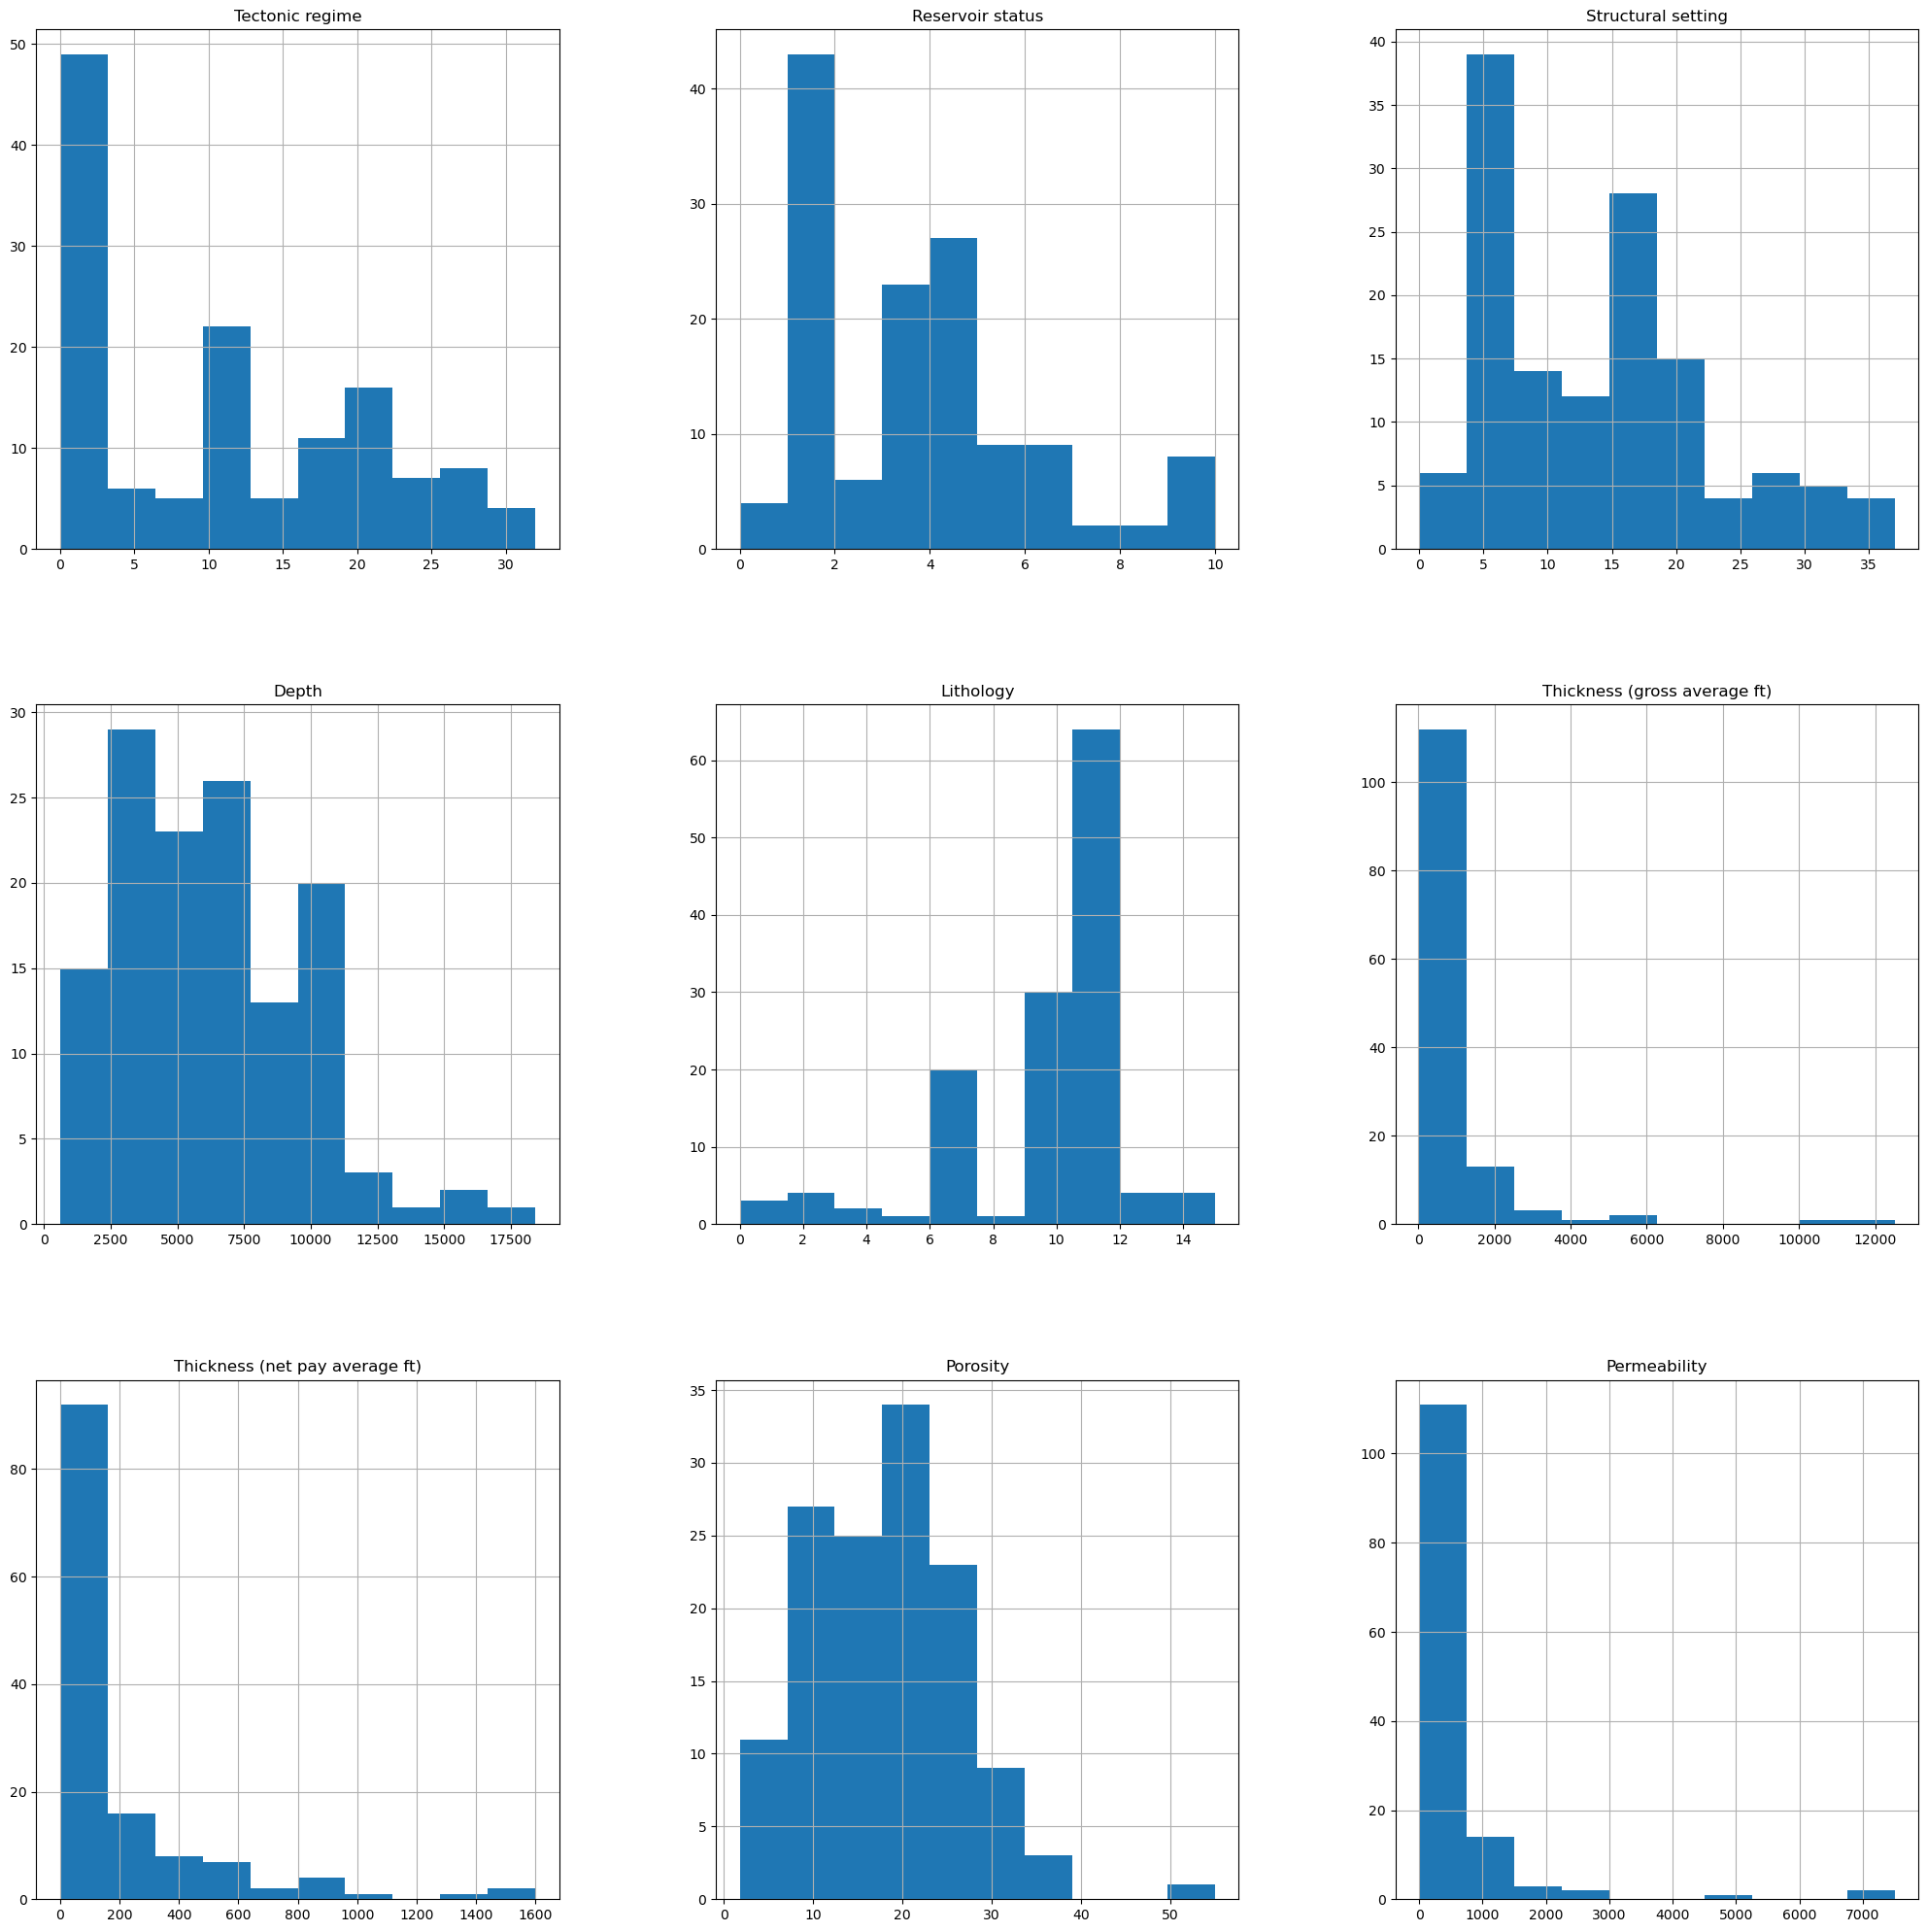

In [115]:
# Plot histogram of numerical data columns

X.hist(bins=10, figsize=(25,25))
plt.show()

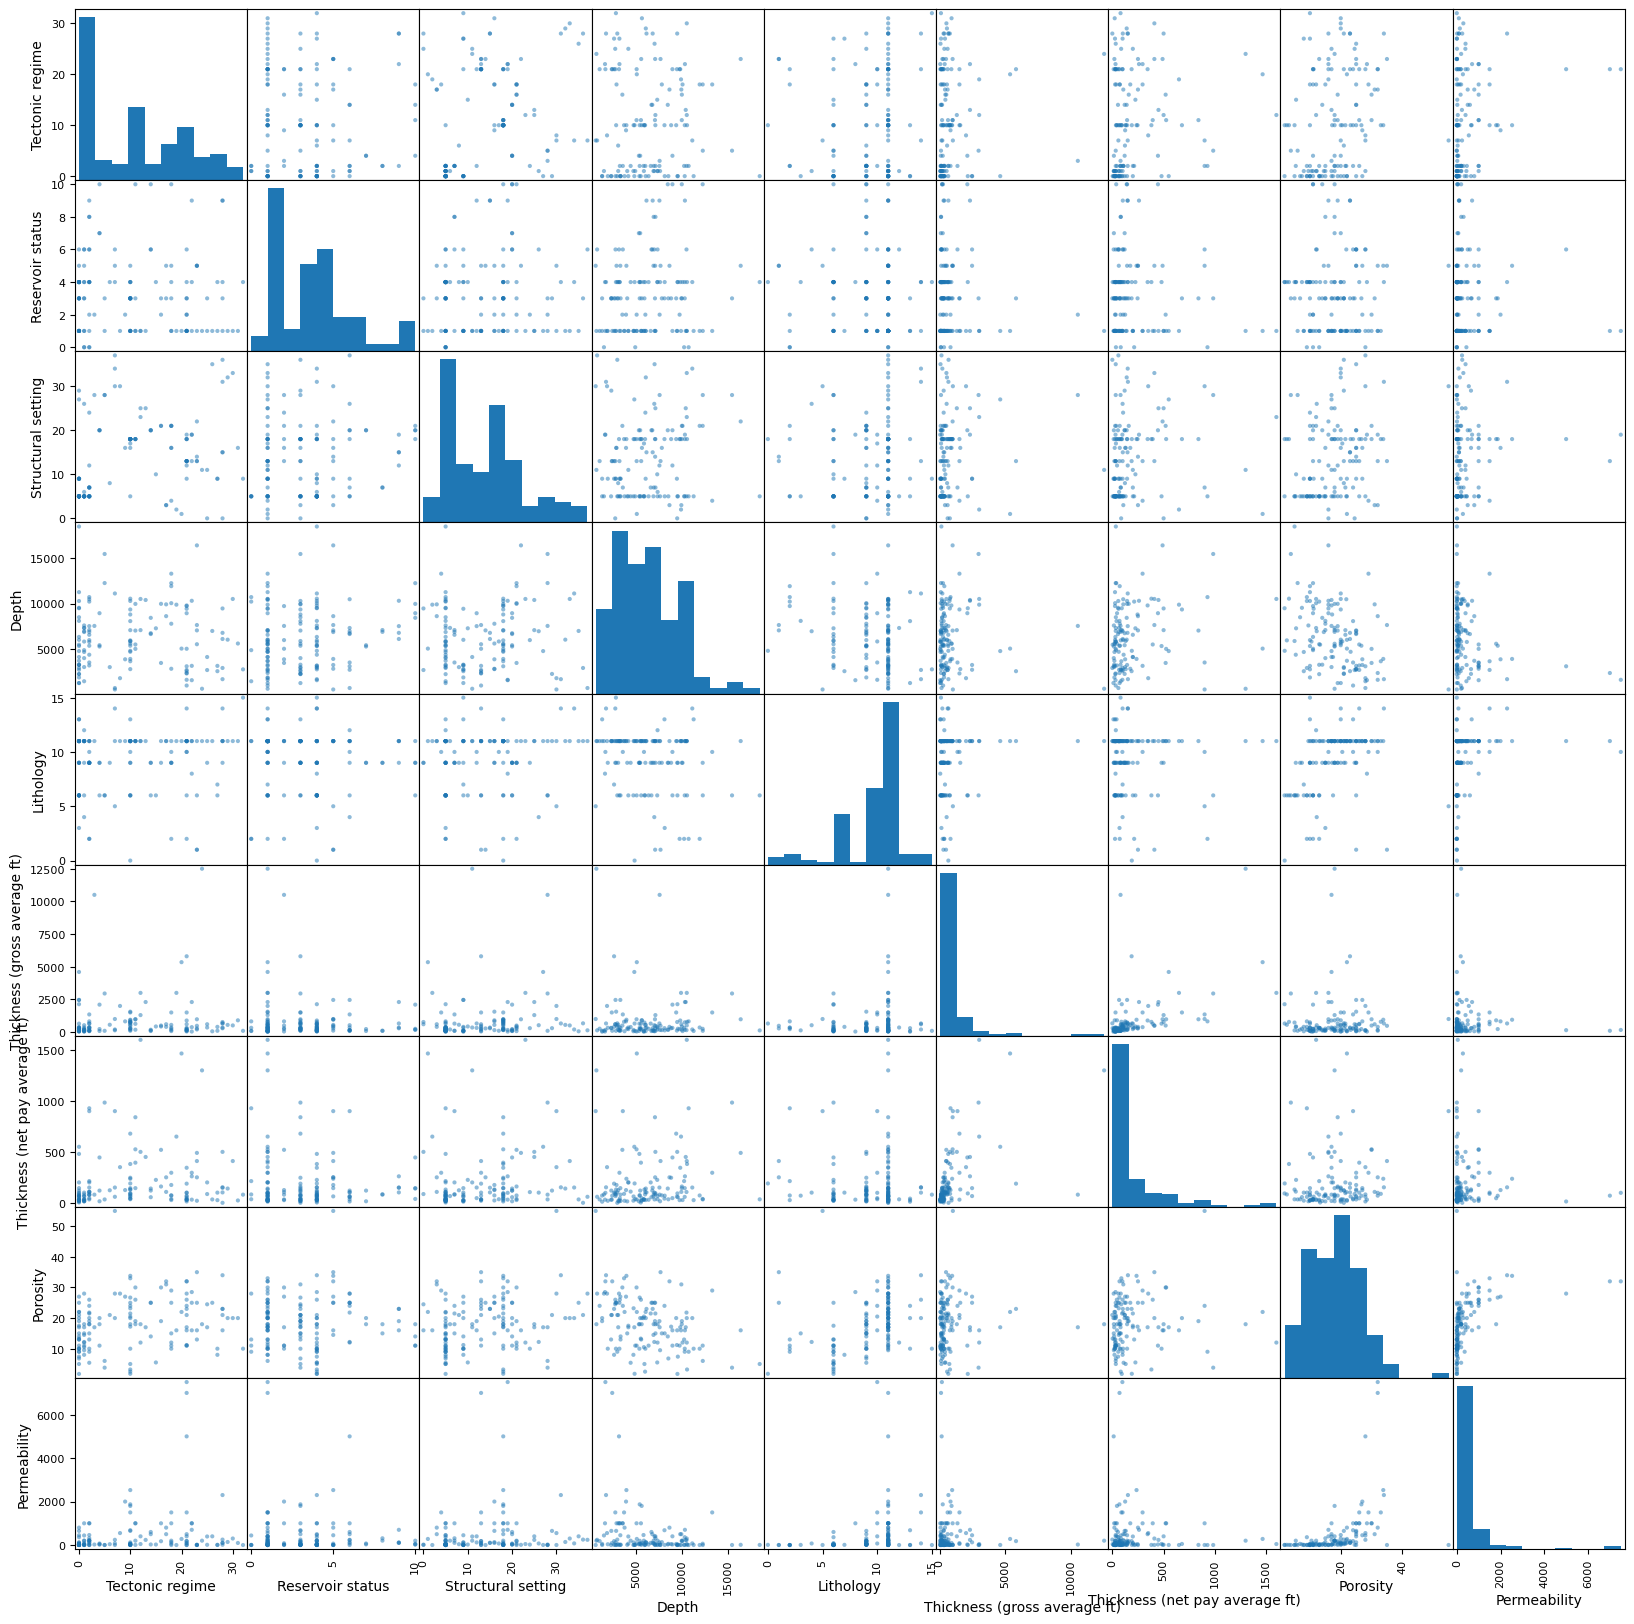

In [116]:
pd.plotting.scatter_matrix(X,  figsize=(20,20))
plt.show()

# Split Data into Training and Test Sets

In [117]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [118]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((89, 9), (44, 9))

In [119]:
# check data types in X_train

X_train.dtypes

Tectonic regime                     int32
Reservoir status                    int32
Structural setting                  int32
Depth                               int64
Lithology                           int32
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
dtype: object

In [120]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Using Gini Index

In [121]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [122]:
y_pred_gini = clf_gini.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8182


In [124]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'GAS', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'GAS', 'GAS',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'GAS',
       'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL'],
      dtype=object)

In [125]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8427


In [126]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8427
Test set score: 0.8182


[Text(0.375, 0.875, 'X[8] <= 0.15\ngini = 0.372\nsamples = 89\nvalue = [1, 14, 4, 1, 69]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[5] <= 2050.0\ngini = 0.35\nsamples = 87\nvalue = [1, 12, 4, 1, 69]'),
 Text(0.25, 0.375, 'X[0] <= 29.5\ngini = 0.279\nsamples = 76\nvalue = [1, 7, 4, 0, 64]'),
 Text(0.125, 0.125, 'gini = 0.247\nsamples = 73\nvalue = [1, 5, 4, 0, 63]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 0, 1]'),
 Text(0.75, 0.375, 'X[5] <= 5200.0\ngini = 0.579\nsamples = 11\nvalue = [0, 5, 0, 1, 5]'),
 Text(0.625, 0.125, 'gini = 0.531\nsamples = 8\nvalue = [0, 5, 0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]')]

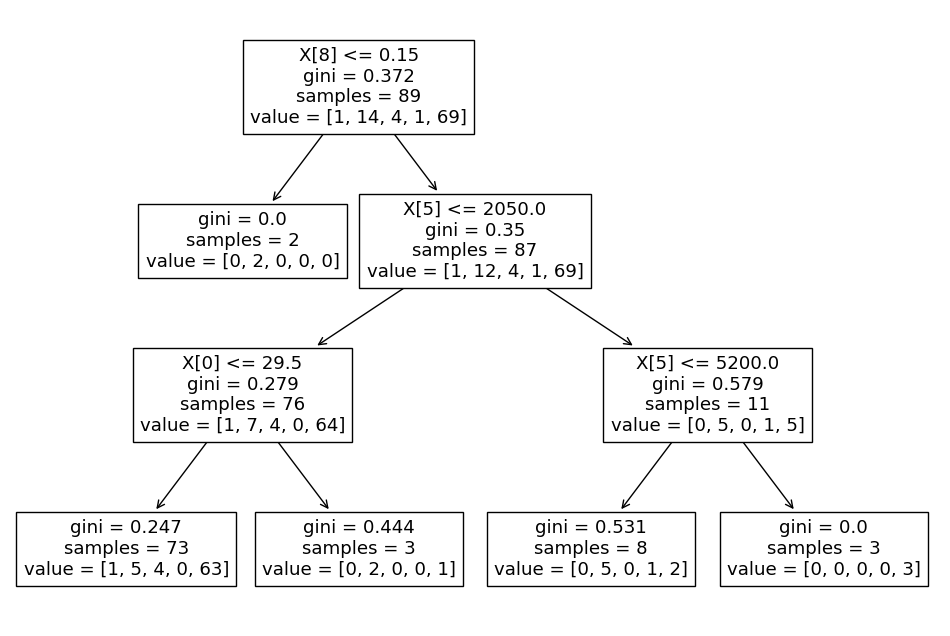

In [127]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree using Entropy Criteria

In [128]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [129]:
y_pred_en = clf_en.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8182


In [131]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['OIL', 'OIL', 'OIL', 'BITUMEN', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'GAS', 'OIL', 'OIL', 'OIL', 'OIL', 'BITUMEN', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'OIL', 'GAS', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'GAS', 'GAS',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL',
       'BITUMEN', 'OIL', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'OIL',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'GAS',
       'OIL', 'OIL', 'OIL', 'OIL', 'GAS', 'OIL', 'OIL', 'METHANE HYDRATE',
       'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL', 'OIL'],
      dtype=object)

In [132]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8764


In [133]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8764
Test set score: 0.8182


[Text(0.5, 0.875, 'X[5] <= 2050.0\nentropy = 1.051\nsamples = 89\nvalue = [1, 14, 4, 1, 69]'),
 Text(0.25, 0.625, 'X[8] <= 0.25\nentropy = 0.894\nsamples = 78\nvalue = [1, 9, 4, 0, 64]'),
 Text(0.125, 0.375, 'X[5] <= 585.0\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 0, 0, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.375, 0.375, 'X[1] <= 0.5\nentropy = 0.803\nsamples = 74\nvalue = [1, 6, 4, 0, 63]'),
 Text(0.3125, 0.125, 'entropy = 1.585\nsamples = 3\nvalue = [1, 0, 1, 0, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.665\nsamples = 71\nvalue = [0, 6, 3, 0, 62]'),
 Text(0.75, 0.625, 'X[1] <= 4.0\nentropy = 1.349\nsamples = 11\nvalue = [0, 5, 0, 1, 5]'),
 Text(0.625, 0.375, 'X[8] <= 12.5\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 0, 0, 5]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 5\nva

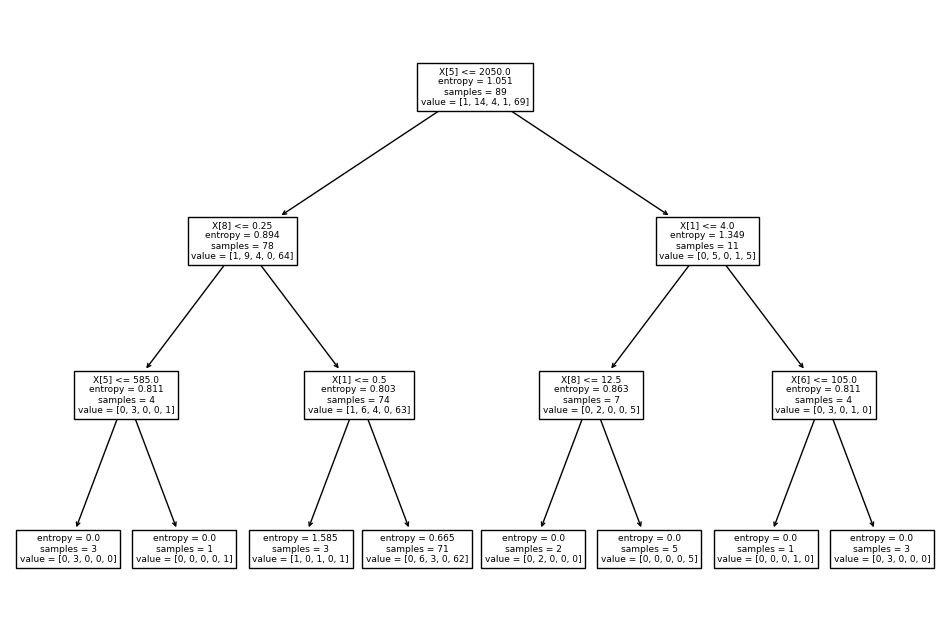

In [134]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# Performance Analysis and Classification Report

In [135]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm2)

Confusion matrix

 [[ 4  0  4]
 [ 0  0  4]
 [ 0  0 32]]


In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                precision    recall  f1-score   support

           GAS       1.00      0.50      0.67         8
GAS-CONDENSATE       0.00      0.00      0.00         4
           OIL       0.80      1.00      0.89        32

      accuracy                           0.82        44
     macro avg       0.60      0.50      0.52        44
  weighted avg       0.76      0.82      0.77        44



# Creating Trained Model File

In [137]:
# Save the trained model(Gini Index Model) to a file
joblib.dump(clf_gini, 'trained_model_gini.joblib')

['trained_model_gini.joblib']

In [138]:
# Save the trained model(Entropy Criteria Model) to a file
joblib.dump(clf_en, 'trained_model_en.joblib')

['trained_model_en.joblib']